In [22]:
# This module is use for REST API
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from io import BytesIO
from PIL import Image
%matplotlib inline

In [23]:
# Paste your _key here
subscription_key = "eeb35d3bc60b4298addcea8d14bb022c"
assert subscription_key

In [24]:
# Windows service URL corresponds to the region you used when setting up the API key
emotion_recognition_url = "https://westus.api.cognitive.microsoft.com/emotion/v1.0/recognize"


In [25]:
# Since the image data is passed as part of the request body,
# notice that you need to set the Content-Type header to application/octet-stream. 
# If you are passing in an image via a URL, remember to set the header to:

In [26]:
header = {'Ocp-Apim-Subscription-Key': subscription_key }


In [27]:
# create a dictionary containing the URL:

In [28]:
data = {'url': "https://pbs.twimg.com/profile_images/809794827818659840/rr0FN4kS_400x400.jpg"}

In [29]:
# and pass that to the requests library using:

In [30]:
requests.post(emotion_recognition_url, headers=header, json=data)

<Response [200]>

In [31]:
# This walkthrough uses images that are stored on disk and for url see REST API documentation 
import os
os.chdir("/home/kamran/Deep Learning/")

In [32]:
# We can download some sample images from windows website for testing
# Note run the following commands in bash
# mkdir -p images
# curl -Ls https://aka.ms/csnb-emotion-1 -o images/emotion_1.jpg
# curl -Ls https://aka.ms/csnb-emotion-2 -o images/emotion_2.jpg


In [33]:
image_path = "images/emotion_1.jpg"

In [34]:
image_data = open(image_path, "rb").read()

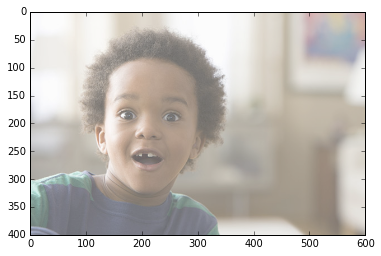

In [35]:
image  = Image.open(image_path)
ax     = plt.imshow(image, alpha=0.6)

In [36]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key, "Content-Type": "application/octet-stream" }
response = requests.post(emotion_recognition_url, headers=headers, data=image_data)
response.raise_for_status()
analysis = response.json()
analysis

[{u'faceRectangle': {u'height': 162, u'left': 130, u'top': 141, u'width': 162},
  u'scores': {u'anger': 9.29041e-06,
   u'contempt': 0.000118981574,
   u'disgust': 3.15619363e-05,
   u'fear': 0.000589638,
   u'happiness': 0.06630674,
   u'neutral': 0.00555004273,
   u'sadness': 7.44669524e-06,
   u'surprise': 0.9273863}}]

In [ ]:
# The following lines of code the detected emotions on the faces in the image using the matplotlib library. 
# To reduce clutter, only the top three emotions are shown.

for face in analysis:
    fr = face["faceRectangle"]
    em = face["scores"]
    origin = (fr["left"], fr["top"])
    p = Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    ct = "\n".join(["{0:<10s}{1:>.4f}".format(k,v) for k, v in sorted(list(em.items()),key=lambda r: r[1], reverse=True)][:3])
    plt.text(origin[0], origin[1], ct, fontsize=20)    
_ = plt.axis("off")

In [18]:
subscription_key = "eeb35d3bc60b4298addcea8d14bb022c"
emotion_recognition_url = "https://westus.api.cognitive.microsoft.com/emotion/v1.0/recognize"


def annotate_image(image_path):    
    image_data = open(image_path, "rb").read()
    headers  = {'Ocp-Apim-Subscription-Key': subscription_key, "Content-Type": "application/octet-stream" }
    response = requests.post(emotion_recognition_url, headers=headers, data=image_data)
    response.raise_for_status()
    analysis = response.json()
    return analysis


In [ ]:
for face in analysis:
        fr = face["faceRectangle"]
        em = face["scores"]
        origin = (fr["left"], fr["top"])
        p = Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        ct = "\n".join(["{0:<10s}{1:>.4f}".format(k,v) for k, v in sorted(list(em.items()),key=lambda r: r[1], reverse=True)][:3])
        plt.text(origin[0], origin[1], ct, fontsize=20, va="bottom")    
        _ = plt.axis("off")


In [19]:
annotate_image("/home/kamran/Deep Learning/images/emotion_2.jpg")


[{u'faceRectangle': {u'height': 163, u'left': 250, u'top': 127, u'width': 163},
  u'scores': {u'anger': 0.09557262,
   u'contempt': 0.003917685,
   u'disgust': 0.684764564,
   u'fear': 4.03712329e-06,
   u'happiness': 8.999826e-08,
   u'neutral': 0.002147009,
   u'sadness': 0.213587672,
   u'surprise': 6.34691469e-06}}]